In [1]:
## Importing the required python libraries 
import os, sys
import warnings
import timeit
import numpy as np
import pandas as pd 
import pkg_resources
import matplotlib.pyplot as plt
import re
import seaborn as sns


In [2]:
## Plot the number of genes with less than 5 transposons in all mutants 

pergene_files=[]
#data_dir= "../satay/data_files/data_unmerged/"
#data_dir="../transposonmapper/data_files/files4test/"
data_dir="../postprocessed-data/"
#data_dir="../transposonmapper/data_files/"
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("pergene_insertions.xlsx"):
            pergene_files.append(os.path.join(root, file))

In [3]:
list_data=[]
for i in pergene_files:
    list_data.append(pd.read_excel(i,engine='openpyxl',index_col="Unnamed: 0"))

In [4]:
keys=[]
for i in np.arange(0,len(pergene_files)):
    keys.append(pergene_files[i].split("/")[-1].split("_")[0]+"_"+pergene_files[i].split("/")[-1].split("_")[1])

In [15]:
list_data_pd=pd.concat(list_data,axis=0,keys=keys)

In [57]:
a0=list_data_pd.loc[keys[0]]
len(a0[(a0.loc[:,"Insertions"]<5) & (a0.loc[:,"Reads"]<5)])

157

In [63]:
L=[]
for i in np.arange(1,len(keys)):
    tmp=(list_data_pd.loc[keys[i]])
    L.append(len(tmp[(tmp.loc[:,"Insertions"]<2) & (tmp.loc[:,"Reads"]<2)]))



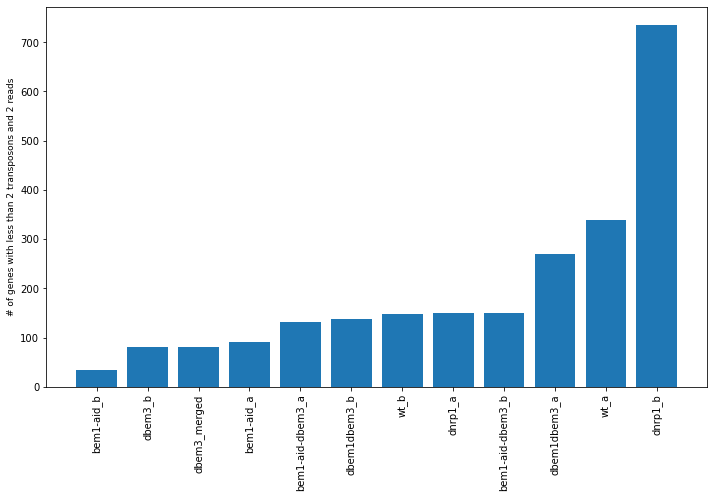

In [74]:
L_dict=dict(zip(keys,L))

A={k: v for k, v in sorted(L_dict.items(), key=lambda item: item[1])}

fig = plt.figure(figsize=(10, 7))
plt.bar(A.keys(),A.values())
plt.xticks(rotation=90);

plt.ylabel("# of genes with less than 2 transposons and 2 reads",fontsize=9)
plt.tight_layout(pad=1)
plt.savefig("../figures/fig_number_genes_with_less_than_2_transposons_and_2_reads.png",dpi=300)
